# Imports

In [1]:
import sys
sys.executable

'/home/stav/.local/share/virtualenvs/vokenization-XaO4r3tO/bin/python'

In [2]:
import os
import sys

In [3]:
import os
import sys
import h5py
import time
# import youtube_dl

import numpy as np
import pandas as pd

import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
# from ipywidgets import interact
from IPython.display import YouTubeVideo, Markdown, display, Video, Image

from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
sys.path.append('/Users/staveshemesh/Projects/shstav2/token_voken/src')
sys.path.append('/Users/staveshemesh/Projects/shstav2/token_voken')
sys.path.append('/home/stav/Projects/token_voken')

In [5]:
from src.common.path_resolvers import resolve_interval_raw_text_path
from src.common.display_utils import display_value_counts, printmd
from src.common.constants import FRAME_RATE

In [6]:
pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

# Constants

In [7]:
SPEAKER_NAME   = 'noah'
INTERVALS_ORG_PATH = '/home/stav/Data/PATS_DATA/DataFrames/original/cmu_intervals_df.csv'
INTERVALS_PATH     = '/home/stav/Data/PATS_DATA/DataFrames/df_intervals_all.csv'
VIDEOS_PATH        = '/home/stav/Data/PATS_DATA/DataFrames/df_videos_all.csv'

In [8]:
PATS_SPEAKER_PATS_INTERVAL_DIR = '/home/stav/Data/PATS_DATA/Videos/noah'

# DataFrames

### df_intervals_org

In [9]:
df_intervals_org = pd.read_csv(INTERVALS_ORG_PATH)

In [10]:
df_intervals_org.shape

(84289, 8)

In [11]:
df_intervals_org.head()

,dataset,delta_time,end_time,interval_id,speaker,start_time,video_fn,video_link
0,train,25.83,2019-06-07 00:13:07.420754,120149,almaram,2019-06-07 00:12:41.594928,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
1,train,47.78,2019-06-07 00:20:24.357691,120150,almaram,2019-06-07 00:19:36.576577,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
2,train,1.67,2019-06-07 00:08:39.252586,120312,almaram,2019-06-07 00:08:37.584251,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
3,train,22.09,2019-06-07 00:09:02.409076,120315,almaram,2019-06-07 00:08:40.320320,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s
4,train,59.66,2019-06-07 00:24:26.266266,120472,almaram,2019-06-07 00:23:26.606607,Lessons_in_Fiqh_02-_How_to_do_wudu-iUGLu4BYH7s.mkv,http://www.youtube.com/watch?v=iUGLu4BYH7s


In [12]:
df_intervals_org[df_intervals_org['video_fn'] == '2heqqCYCR2s']

,dataset,delta_time,end_time,interval_id,speaker,start_time,video_fn,video_link
79990,train,6.47,2019-09-26 00:05:08.733333349,cmu0000033759,noah,2019-09-26 00:05:02.266666650,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79991,train,50.70,2019-09-26 00:06:01.066666603,cmu0000033760,noah,2019-09-26 00:05:10.366666555,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79992,train,43.27,2019-09-26 00:07:03.366666555,cmu0000033762,noah,2019-09-26 00:06:20.099999905,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79993,train,31.10,2019-09-26 00:10:08.599999905,cmu0000033765,noah,2019-09-26 00:09:37.500000,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79994,train,40.77,2019-09-26 00:12:08.900000095,cmu0000033769,noah,2019-09-26 00:11:28.133333445,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79995,train,20.57,2019-09-26 00:13:02.900000095,cmu0000033770,noah,2019-09-26 00:12:42.333333254,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79996,train,44.27,2019-09-26 00:15:45.766666651,cmu0000033772,noah,2019-09-26 00:15:01.500000,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79997,train,28.63,2019-09-26 00:17:07.966666698,cmu0000033774,noah,2019-09-26 00:16:39.333333254,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s
79998,train,54.87,2019-09-26 00:18:44.533333301,cmu0000033777,noah,2019-09-26 00:17:49.666666746,2heqqCYCR2s,https://www.youtube.com/watch?v=2heqqCYCR2s


In [13]:
df_intervals_org['speaker'].value_counts().to_frame().head(n=15)

,speaker
angelica,19795
jon,8257
ellen,5605
colbert,4744
seth,4636
oliver,4629
corden,4408
noah,4367
conan,4266
chemistry,4083


In [14]:
df_intervals_all = pd.read_csv(INTERVALS_PATH)
MASK_SPEAKER = df_intervals_all['speaker'] == SPEAKER_NAME
df_intervals = df_intervals_all[MASK_SPEAKER].copy()
df_intervals.rename(columns={'delta_time': 'duration'}, inplace=True)

/home/stav/.local/share/virtualenvs/vokenization-XaO4r3tO/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [186]:
df_intervals.head()

,Unnamed: 0,Unnamed: 0.1,dataset,duration,end_time,interval_id,speaker,start_time,video_fn,video_link,...,org_end_time,start_time_string,end_time_string,video_id,max_frames_token,valid,valid_max_frames_per_token,valid_duration,valid_single_token_per_frame,video_downloded
79922,79922,79922,train,7.23,0 days 00:00:08.090000,cmu0000033570,noah,0 days 00:00:00.860000,rUZL4z5Drcw,https://www.youtube.com/watch?v=rUZL4z5Drcw,...,0 days 00:00:08.090000,00:00:00.86,00:00:08.9,rUZL4z5Drcw,-1,False,False,False,True,False
79923,79923,79923,train,7.80,0 days 00:00:30.700000,cmu0000033572,noah,0 days 00:00:22.900000,rUZL4z5Drcw,https://www.youtube.com/watch?v=rUZL4z5Drcw,...,0 days 00:00:30.700000,00:00:22.90,00:00:30.70,rUZL4z5Drcw,-1,False,False,False,True,False
79924,79924,79924,train,16.03,0 days 00:00:48.460000,cmu0000033573,noah,0 days 00:00:32.430000,rUZL4z5Drcw,https://www.youtube.com/watch?v=rUZL4z5Drcw,...,0 days 00:00:48.460000,00:00:32.43,00:00:48.46,rUZL4z5Drcw,-1,False,False,False,True,False
79925,79925,79925,train,17.37,0 days 00:02:04.560000,cmu0000033576,noah,0 days 00:01:47.200000,rUZL4z5Drcw,https://www.youtube.com/watch?v=rUZL4z5Drcw,...,0 days 00:02:04.560000,00:01:47.20,00:02:04.56,rUZL4z5Drcw,-1,False,False,False,True,False
79926,79926,79926,train,13.00,0 days 00:05:32.860000,cmu0000033589,noah,0 days 00:05:19.860000,rUZL4z5Drcw,https://www.youtube.com/watch?v=rUZL4z5Drcw,...,0 days 00:05:32.860000,00:05:19.86,00:05:32.86,rUZL4z5Drcw,-1,False,False,False,True,False


In [15]:
df_intervals.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'dataset', 'duration', 'end_time',
       'interval_id', 'speaker', 'start_time', 'video_fn', 'video_link',
       'org_start_time', 'org_end_time', 'start_time_string',
       'end_time_string', 'video_id', 'max_frames_token', 'valid',
       'valid_max_frames_per_token', 'valid_duration',
       'valid_single_token_per_frame', 'video_downloded'],
      dtype='object')

In [16]:
df_intervals.shape

(4367, 21)

In [17]:
LIST_BULLET = '  ◘ '
TAB = '&nbsp;&nbsp;&nbsp;&nbsp;'
VIDEO_ID_LEN = 11

In [18]:
! echo {PATS_SPEAKER_PATS_INTERVAL_DIR}
print('   Total Intervals:', end=' ')
! ls -al {PATS_SPEAKER_PATS_INTERVAL_DIR} | wc -l

/home/stav/Data/PATS_DATA/Videos/noah
   Total Intervals: 676


In [19]:
COL_VALID_HD5 = 'valid_hd5'

In [20]:
COLS_VALIDITY = [
    'valid',
    'valid_max_frames_per_token',
    'valid_duration',
    'valid_single_token_per_frame'
]
COLS_VIEW = [
    'speaker', 'interval_id',
    'duration', 'start_time_string', 'end_time_string',
    'video_link'
]
COLS_VIDEOS = [
    'video_link',
    'data_ratio', 'duration_net', 'duration_total',
    'num_intervals'
]

## df_intervals

In [21]:
df_intervals.sample(n=3)[COLS_VIEW]

,speaker,interval_id,duration,start_time_string,end_time_string,video_link
81077,noah,cmu0000036062,56.73,00:04:34.20,00:05:30.93,https://www.youtube.com/watch?v=pvXJnukCFoo
81115,noah,cmu0000036149,12.40,00:00:00.0,00:00:12.40,https://www.youtube.com/watch?v=1s-h-bx-cbY
81447,noah,cmu0000036824,17.83,00:03:38.43,00:03:56.26,https://www.youtube.com/watch?v=rvPRaxR7HOE


In [22]:
df_intervals['speaker'].value_counts().to_frame()

,speaker
noah,4367


In [23]:
def print_df_info(df):
    print(f'{LIST_BULLET}Videos: #{df["video_link"].nunique():,}')
    print(f'{LIST_BULLET}Intervals: #{df["interval_id"].nunique():,}')
    total_duration = df["duration"].sum()
    total_duration_string = time.strftime('%H hours, %M minutues, %S seconds', time.gmtime(total_duration))
    print(f'{LIST_BULLET}Total Duration: {total_duration_string} ({int(total_duration):,} seconds)')
    all_youtube = df_intervals['video_link'].str.contains('youtube').all()
    print(f'{LIST_BULLET}All are Youtube videos: {all_youtube}')

In [24]:
printmd(f'Speaker **{SPEAKER_NAME}**:')
print_df_info(df_intervals)

Speaker **noah**:

  ◘ Videos: #671
  ◘ Intervals: #4,367
  ◘ Total Duration: 04 hours, 03 minutues, 30 seconds (101,010 seconds)
  ◘ All are Youtube videos: True


## df_videos

### Duration: Net and Total

In [25]:
df_videos_all = pd.read_csv(VIDEOS_PATH)

In [26]:
df_videos_all[df_videos_all['video_link'] == 'https://www.youtube.com/watch?v=-V7QBRoxa4A']

,Unnamed: 0,speaker,actual_duration,video_id,video_link,duration_secs
4009,4009,noah,137.33,-V7QBRoxa4A,https://www.youtube.com/watch?v=-V7QBRoxa4A,366


In [27]:
df_videos = df_videos_all[df_videos_all['speaker'] == SPEAKER_NAME].copy()

In [28]:
# df_videos = df_intervals.groupby('video_link')['duration'].agg(['sum','count']).reset_index()
# df_videos.rename(columns={'sum': 'duration_net', 'count': 'num_intervals'}, inplace=True)
# print(f'df_videos: {df_videos.shape[0]}')
# df_videos.head()

In [29]:
df_videos.columns

Index(['Unnamed: 0', 'speaker', 'actual_duration', 'video_id', 'video_link',
       'duration_secs'],
      dtype='object')

In [30]:
df_videos.rename(
    columns={'actual_duration': 'duration_net', 'duration_secs': 'duration_total'},
    inplace=True)

In [31]:
df_videos.drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
df_videos.head()

,speaker,duration_net,video_id,video_link,duration_total
4006,noah,201.63,-DoL722yNn4,https://www.youtube.com/watch?v=-DoL722yNn4,436
4007,noah,196.67,-EDP12VmqvM,https://www.youtube.com/watch?v=-EDP12VmqvM,374
4008,noah,245.00,-Kt0bI6o4Kg,https://www.youtube.com/watch?v=-Kt0bI6o4Kg,431
4009,noah,137.33,-V7QBRoxa4A,https://www.youtube.com/watch?v=-V7QBRoxa4A,366
4010,noah,23.80,-WBPLBVdmt4,https://www.youtube.com/watch?v=-WBPLBVdmt4,117


In [33]:
df_videos['data_ratio'] = df_videos['duration_net'] / df_videos['duration_total'] * 100
df_videos.sort_values('data_ratio', ascending=False, inplace=True)
# df_videos = df_videos[COLS_VIDEOS]
df_videos.head()

,speaker,duration_net,video_id,video_link,duration_total,data_ratio
4351,noah,108.73,WWEa0p7cKqo,https://www.youtube.com/watch?v=WWEa0p7cKqo,115,94.55
4284,noah,74.83,ON_ZwV2-nOU,https://www.youtube.com/watch?v=ON_ZwV2-nOU,80,93.54
4245,noah,89.63,KP_YpMBYttM,https://www.youtube.com/watch?v=KP_YpMBYttM,96,93.37
4568,noah,74.83,pcKNxA8AF4E,https://www.youtube.com/watch?v=pcKNxA8AF4E,82,91.26
4540,noah,71.83,n3apu-FHU_0,https://www.youtube.com/watch?v=n3apu-FHU_0,79,90.93


In [34]:
df_videos.tail()

,speaker,duration_net,video_id,video_link,duration_total,data_ratio
4634,noah,16.53,vll6MnuC8cg,https://www.youtube.com/watch?v=vll6MnuC8cg,915,1.81
4483,noah,5.03,hVIeIExVRSw,https://www.youtube.com/watch?v=hVIeIExVRSw,363,1.39
4515,noah,4.27,l0w4FjJH8k4,https://www.youtube.com/watch?v=l0w4FjJH8k4,331,1.29
4356,noah,7.37,WlHpv2YySAc,https://www.youtube.com/watch?v=WlHpv2YySAc,907,0.81
4173,noah,4.97,DFZPaMgjChE,https://www.youtube.com/watch?v=DFZPaMgjChE,642,0.77


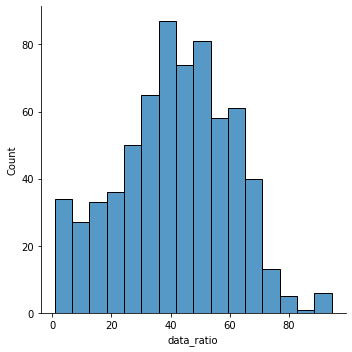

In [35]:
sns.displot(df_videos['data_ratio']);

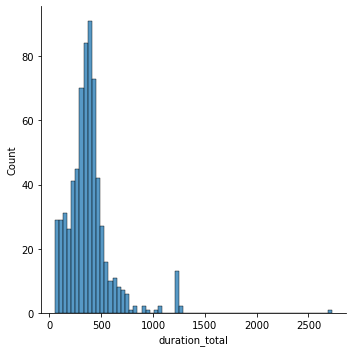

In [36]:
sns.displot(df_videos['duration_total']);

In [37]:
df_videos['duration_total'].describe().to_frame()

,duration_total
count,671.00
mean,377.96
std,223.71
min,50.00
25%,265.00
50%,365.00
75%,441.00
max,"2,725.00"


## df_words

In [38]:
def read_text(interval_id):
    raw_text_path = resolve_interval_raw_text_path(interval_id)
    return pd.read_csv(raw_text_path)

def read_text_str(interval_id):
    return ' '.join(read_text(interval_id)['word'].tolist())

In [39]:
speaker_interval_ids = df_intervals['interval_id'].tolist()

In [40]:
speaker_interval_ids[100]

'cmu0000033842'

In [41]:
resolve_interval_raw_text_path(speaker_interval_ids[100])

'/home/stav/Data/PATS_DATA/Videos/noah/g6U0L5ajsvI/cmu0000033842/Text/Raw.csv'

In [42]:
read_text('cmu0000033842')

,word,start_frame,end_frame,frames_count
0,to,0,12,12
1,see,12,38,26
2,what,38,42,4
3,is,42,53,11
4,Boxing,53,57,4
5,Day,57,59,2
6,brackets,59,71,12


In [43]:
interval_text_status = []
interval_id_to_df_words = {}
for interval_id in speaker_interval_ids:
    try:
        df_words = read_text(interval_id)
        interval_id_to_df_words[interval_id] = df_words
        has_text = True
    except FileNotFoundError as e:
        has_text = False
    interval_text_status.append([interval_id, has_text])

In [44]:
len(interval_id_to_df_words)

4109

# Intervals Validity

## Interval PATS Text

### Has Groups (`valid_hd5`)

In [45]:
df_interval_text_status = pd.DataFrame(interval_text_status, columns=['interval_id', COL_VALID_HD5])

In [46]:
df_interval_text_status.head()

,interval_id,valid_hd5
0,cmu0000033570,False
1,cmu0000033572,True
2,cmu0000033573,True
3,cmu0000033576,True
4,cmu0000033589,True


In [47]:
df_interval_text_status[COL_VALID_HD5].value_counts().to_frame()

,valid_hd5
True,4109
False,258


In [48]:
df_intervals = df_intervals.merge(df_interval_text_status)
display_value_counts(df_intervals['valid_hd5'], 'Valid hd5 group')

,valid_hd5
True,4109
False,258


### Token Frames Duration (`valid_max_token_duration`)

In [86]:
MAX_SECONDS_PER_TOKEN = 10
MAX_FRAMES_THRESHOLD = FRAME_RATE * MAX_SECONDS_PER_TOKEN
print(f'Max allowed frames per token is: {MAX_FRAMES_THRESHOLD} frames (= {MAX_SECONDS_PER_TOKEN} seconds)')

Max allowed frames per token is: 150 frames (= 10 seconds)


In [87]:
UNKNOWN_MAX_FRAMES_PER_TOKEN = -1

def get_max_frames_number_for_token(interval_id):
    """
    returns the token idx and the range, of the token with the largest frame range
    """
    try:
        df_tokens = interval_id_to_df_words[interval_id]
        max_token_frames           = df_tokens['frames_count'].max()
        max_token_frames_token_idx = df_tokens['frames_count'].argmax()
    except:
        max_token_frames           = UNKNOWN_MAX_FRAMES_PER_TOKEN
        max_token_frames_token_idx = UNKNOWN_MAX_FRAMES_PER_TOKEN
    return max_token_frames, max_token_frames_token_idx

In [88]:
df_intervals['max_frames_token'] = df_intervals['interval_id'].apply(get_max_frames_number_for_token)

In [89]:
df_intervals['interval_id'].apply(get_max_frames_number_for_token)

0       (-1, -1)
1       (118, 0)
2        (39, 2)
3       (57, 17)
4        (54, 2)
          ...   
4362    (24, 26)
4363     (43, 7)
4364    (26, 40)
4365      (9, 8)
4366     (42, 6)
Name: interval_id, Length: 4367, dtype: object

In [90]:
df_intervals['max_frames_token'], df_intervals['max_token_frames_token_idx'] = \
    zip(*df_intervals['interval_id'].apply(get_max_frames_number_for_token))

In [91]:
df_intervals.head(n=2)

,Unnamed: 0,Unnamed: 0.1,dataset,duration,end_time,interval_id,speaker,start_time,video_fn,video_link,...,video_id,max_frames_token,valid,valid_max_frames_per_token,valid_duration,valid_single_token_per_frame,video_downloded,valid_hd5,max_token_frames_token_idx,valid_max_token_duration
0,79922,79922,train,7.23,0 days 00:00:08.090000,cmu0000033570,noah,0 days 00:00:00.860000,rUZL4z5Drcw,https://www.youtube.com/watch?v=rUZL4z5Drcw,...,rUZL4z5Drcw,-1,False,False,False,True,False,False,-1,True
1,79923,79923,train,7.80,0 days 00:00:30.700000,cmu0000033572,noah,0 days 00:00:22.900000,rUZL4z5Drcw,https://www.youtube.com/watch?v=rUZL4z5Drcw,...,rUZL4z5Drcw,118,False,False,False,True,False,True,0,True


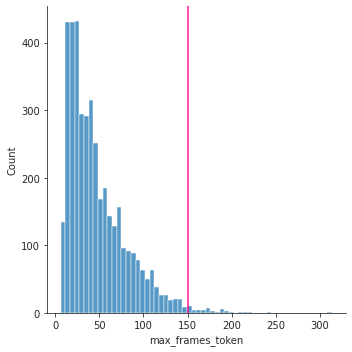

In [92]:
sns.set_style('ticks')
sns.displot(df_intervals[df_intervals['max_frames_token'] != -1]['max_frames_token'])
plt.axvline(MAX_FRAMES_THRESHOLD, color='deeppink');

In [93]:
df_intervals.shape

(4367, 24)

In [94]:
mask_below_max_frames_limit = (df_intervals['max_frames_token'] < MAX_FRAMES_THRESHOLD)
mask_known_max_frames = (df_intervals['max_frames_token'] != UNKNOWN_MAX_FRAMES_PER_TOKEN) 

df_intervals['valid_max_token_duration'] = mask_below_max_frames_limit & mask_known_max_frames
display_value_counts(df_intervals['valid_max_token_duration'], 'Valid Token Duration')

,valid_max_token_duration
True,4056
False,311


In [105]:
df_intervals[~(df_intervals['valid_max_token_duration'])].sample(n=5)[COLS_VIEW + ['max_frames_token', 'max_token_frames_token_idx']]

,speaker,interval_id,duration,start_time_string,end_time_string,video_link,max_frames_token,max_token_frames_token_idx
3545,noah,cmu0000041198,15.17,00:01:33.63,00:01:48.79,https://www.youtube.com/watch?v=wHfNaPcCBNc,-1,-1
2653,noah,cmu0000039283,30.83,00:01:48.86,00:02:19.70,https://www.youtube.com/watch?v=htT9g1uHO00,-1,-1
153,noah,cmu0000033972,52.40,00:03:00.43,00:03:52.83,https://www.youtube.com/watch?v=-ouP4GOBamU,-1,-1
2483,noah,cmu0000038955,10.37,00:00:00.0,00:00:10.36,https://www.youtube.com/watch?v=VvdxznLY6jw,-1,-1
2159,noah,cmu0000038258,9.63,00:00:00.86,00:00:10.50,https://www.youtube.com/watch?v=kmpqnxpYUqA,-1,-1


In [98]:
df_intervals[df_intervals['interval_id'] == 'cmu0000034989'][COLS_VIEW + ['max_frames_token', 'max_token_frames_token_idx']]

,speaker,interval_id,duration,start_time_string,end_time_string,video_link,max_frames_token,max_token_frames_token_idx
649,noah,cmu0000034989,22.37,00:03:28.13,00:03:50.50,https://www.youtube.com/watch?v=o5NFQrhisnw,189,10


In [104]:
read_text_str('cmu0000042143')

'fired her Trump Administration office and did it like that photoshoot'

In [84]:
read_text('cmu0000040509')[100:110]

,word,start_frame,end_frame,frames_count
100,know,534,537,3
101,what,537,540,3
102,I,540,542,2
103,bring,542,542,0
104,it,542,545,3
105,up,545,546,1
106,because,546,548,2
107,also,548,699,151
108,I,699,702,3
109,don't,702,704,2


### Multiple Words Per Frame (`valid_single_token_per_frame`)

In [106]:
df_tokens = read_text('cmu0000035126')
# printmd(f'**Video path**: {resolve_interval_video_path("101204")}')
# printmd(f'**Text path**: {resolve_interval_text_path("101204")}')
print(f'Start token unique: {df_tokens["start_frame"].is_unique}')
df_tokens[24:40]

Start token unique: False


,word,start_frame,end_frame,frames_count
24,felt,149,154,5
25,that,154,155,1
26,you,155,157,2
27,need,157,160,3
28,to,160,161,1
29,do,161,163,2
30,you,163,181,18
31,need,181,181,0
32,to,181,184,3
33,get,184,185,1


In [107]:
MAX_TOKENS_PER_FRAME_LIMIT = 2 # allow not more two tokens with the same start frame

def valid_single_frame_tokens_count(interval_id):
    df_tokens = interval_id_to_df_words.get(interval_id)
    if df_tokens is None:
        return False
    max_tokens_per_frame = df_tokens['start_frame'].value_counts().max()
    return max_tokens_per_frame <= MAX_TOKENS_PER_FRAME_LIMIT

In [109]:
df_intervals['valid_single_token_per_frame'] = df_intervals['interval_id'].apply(valid_single_frame_tokens_count)

In [110]:
display_value_counts(df_intervals['valid_single_token_per_frame'], f'Max of {MAX_TOKENS_PER_FRAME_LIMIT} tokens per frame')

,valid_single_token_per_frame
True,4059
False,308


In [114]:
display_value_counts(
    (df_intervals['valid_single_token_per_frame']) & (df_intervals['valid_max_token_duration']),
    'Valid so far'
)

,0
True,4007
False,360


### Frame Count (`valid_frames_count`)

In [115]:
def valid_interval_frame_count(interval_id, duration):
    df_tokens = interval_id_to_df_words.get(interval_id)
    if df_tokens is None:
        return False
    total_frames = df_tokens['end_frame'].max()
    max_tokens_per_frame = df_tokens['start_frame'].value_counts().max()
    lower_bound = (duration - 2) * FRAME_RATE
    upper_bound = (duration + 1) * FRAME_RATE
    is_valid = lower_bound <= total_frames <= upper_bound
    debug_symbol = '✓' if is_valid else '✗'
    if interval_id in df_intervals['interval_id'][:10].tolist():
        print(debug_symbol, interval_id, round(lower_bound, 2), total_frames, round(upper_bound, 2))
    return lower_bound <= total_frames <= upper_bound

In [116]:
df_intervals['valid_frames_count'] = df_intervals[['interval_id', 'duration']].apply(lambda x: valid_interval_frame_count(*x), axis=1)

✓ cmu0000033572 87.0 118 132.0
✓ cmu0000033573 210.5 241 255.5
✓ cmu0000033576 230.5 261 275.5
✓ cmu0000033589 165.0 196 210.0
✓ cmu0000033591 537.0 568 582.0
✓ cmu0000033592 149.5 180 194.5
✓ cmu0000033594 238.0 269 283.0
✓ cmu0000033595 525.0 556 570.0
✓ cmu0000033596 57.5 88 102.5


In [117]:
display_value_counts(df_intervals['valid_frames_count'], f'Frame Count = Frame Rate * Seconds')

,valid_frames_count
True,4109
False,258


In [118]:
display_value_counts(
    ((df_intervals['valid_single_token_per_frame']) &
     (df_intervals['valid_max_token_duration']) &
     df_intervals['valid_frames_count']),
    'Valid so far'
)

,0
True,4007
False,360


In [119]:
read_text('cmu0000035126').head(n=20)

,word,start_frame,end_frame,frames_count
0,granny,0,40,40
1,you,40,58,18
2,think,58,62,4
3,he's,62,65,3
4,doing,65,67,2
5,a,67,70,3
6,good,70,73,3
7,job,73,76,3
8,as,76,82,6
9,president,82,85,3


## Interval Video

### Total Duration (`valid_duration`)

In [120]:
MIN_DURATION_SECS_THRESHOLD = 5

In [121]:
df_intervals.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'dataset', 'duration', 'end_time',
       'interval_id', 'speaker', 'start_time', 'video_fn', 'video_link',
       'org_start_time', 'org_end_time', 'start_time_string',
       'end_time_string', 'video_id', 'max_frames_token', 'valid',
       'valid_max_frames_per_token', 'valid_duration',
       'valid_single_token_per_frame', 'video_downloded', 'valid_hd5',
       'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count'],
      dtype='object')

In [122]:
df_intervals['valid_duration'] = MIN_DURATION_SECS_THRESHOLD < df_intervals['duration']

In [123]:
df_intervals.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
dataset                          object
duration                        float64
end_time                         object
interval_id                      object
speaker                          object
start_time                       object
video_fn                         object
video_link                       object
org_start_time                   object
org_end_time                     object
start_time_string                object
end_time_string                  object
video_id                         object
max_frames_token                  int64
valid                              bool
valid_max_frames_per_token         bool
valid_duration                     bool
valid_single_token_per_frame       bool
video_downloded                    bool
valid_hd5                          bool
max_token_frames_token_idx        int64
valid_max_token_duration           bool
valid_frames_count                 bool


In [124]:
display_value_counts(df_intervals['valid_duration'], f'Duration > {MIN_DURATION_SECS_THRESHOLD} seconds')

,valid_duration
True,4150
False,217


## Intervals.merge(Videos)

In [323]:
# df_intervals.drop('Unnamed: 0', inplace=True, axis=1)
# df_intervals.drop('Unnamed: 0.1', inplace=True, axis=1)
# df_intervals.drop('duration_total_x', inplace=True, axis=1)

In [125]:
df_intervals.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'dataset', 'duration', 'end_time',
       'interval_id', 'speaker', 'start_time', 'video_fn', 'video_link',
       'org_start_time', 'org_end_time', 'start_time_string',
       'end_time_string', 'video_id', 'max_frames_token', 'valid',
       'valid_max_frames_per_token', 'valid_duration',
       'valid_single_token_per_frame', 'video_downloded', 'valid_hd5',
       'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count'],
      dtype='object')

In [126]:
df_videos.columns

Index(['speaker', 'duration_net', 'video_id', 'video_link', 'duration_total',
       'data_ratio'],
      dtype='object')

In [127]:
set(df_intervals.columns) & set(df_videos.columns)

{'speaker', 'video_id', 'video_link'}

In [128]:
df_intervals = df_intervals.merge(df_videos, on=['speaker', 'video_id', 'video_link'])

In [129]:
df_intervals.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'dataset', 'duration', 'end_time',
       'interval_id', 'speaker', 'start_time', 'video_fn', 'video_link',
       'org_start_time', 'org_end_time', 'start_time_string',
       'end_time_string', 'video_id', 'max_frames_token', 'valid',
       'valid_max_frames_per_token', 'valid_duration',
       'valid_single_token_per_frame', 'video_downloded', 'valid_hd5',
       'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count', 'duration_net', 'duration_total', 'data_ratio'],
      dtype='object')

### Total Duration (`valid_video_data_ratio`)

In [130]:
# The minimal allowed ratio between the total length of the intervals, to the full video length
MIN_VIDEO_DATA_RATIO_THRESHOLD = 10

In [131]:
df_intervals['valid_video_data_ratio'] = df_intervals['data_ratio'] > MIN_VIDEO_DATA_RATIO_THRESHOLD

In [132]:
display_value_counts(df_intervals['valid_video_data_ratio'], f'Video data ratio > {MIN_VIDEO_DATA_RATIO_THRESHOLD}%')

,valid_video_data_ratio
True,4278
False,89


## Finalize Valid

In [133]:
df_intervals.columns[df_intervals.columns.str.contains('valid_')].tolist()

['valid_max_frames_per_token',
 'valid_duration',
 'valid_single_token_per_frame',
 'valid_hd5',
 'valid_max_token_duration',
 'valid_frames_count',
 'valid_video_data_ratio']

In [134]:
df_intervals.drop('valid_max_frames_per_token', axis=1, errors='ignore', inplace=True)

In [135]:
COLS_VALID = [
    'valid_duration',
    'valid_single_token_per_frame',
    'valid_hd5',
    'valid_max_token_duration',
    'valid_frames_count',
    'valid_video_data_ratio'
]

In [136]:
total_intervals = len(df_intervals)
df_validity_summary = df_intervals[COLS_VALID].sum().to_frame().rename(columns={0: 'records'})
df_validity_summary['%records'] = df_validity_summary['records'] / total_intervals * 100
df_validity_summary

,records,%records
valid_duration,4150,95.03
valid_single_token_per_frame,4059,92.95
valid_hd5,4109,94.09
valid_max_token_duration,4056,92.88
valid_frames_count,4109,94.09
valid_video_data_ratio,4278,97.96


In [137]:
df_intervals['valid'] = df_intervals[COLS_VALID].all(axis=1)
display_value_counts(df_intervals['valid'], 'Valid Intervals')

,valid
True,3744
False,623


In [138]:
df_validity_summary = df_intervals[['valid'] + COLS_VALID].sum().to_frame().rename(columns={0: 'records'})
df_validity_summary['%records'] = df_validity_summary['records'] / total_intervals * 100
df_validity_summary

,records,%records
valid,3744,85.73
valid_duration,4150,95.03
valid_single_token_per_frame,4059,92.95
valid_hd5,4109,94.09
valid_max_token_duration,4056,92.88
valid_frames_count,4109,94.09
valid_video_data_ratio,4278,97.96


In [153]:
df_intervals[['valid'] + COLS_VIEW + COLS_VALID].sample(n=2)

,valid,speaker,interval_id,duration,start_time_string,end_time_string,video_link,valid_duration,valid_single_token_per_frame,valid_hd5,valid_max_token_duration,valid_frames_count,valid_video_data_ratio
1496,True,noah,cmu0000036769,14.03,00:00:00.83,00:00:14.86,https://www.youtube.com/watch?v=0IJSSBMLz6g,True,True,True,True,True,True
4130,True,noah,cmu0000042390,21.43,00:00:50.29,00:01:11.73,https://www.youtube.com/watch?v=_EfVgmV3rWc,True,True,True,True,True,True


In [154]:
read_text_str('cmu0000036769')

"even though it's our only Monday but seems to be more news than we have the time to get through in a single show so we won't try good night everybody we had lived in a segment we call ain't nobody got time for that"

# Download Data

## df_intervals.to_csv

In [155]:
df_intervals.columns

Index(['dataset', 'duration', 'end_time', 'interval_id', 'speaker',
       'start_time', 'video_fn', 'video_link', 'org_start_time',
       'org_end_time', 'start_time_string', 'end_time_string', 'video_id',
       'max_frames_token', 'valid', 'valid_duration',
       'valid_single_token_per_frame', 'video_downloded', 'valid_hd5',
       'max_token_frames_token_idx', 'valid_max_token_duration',
       'valid_frames_count', 'duration_net', 'duration_total', 'data_ratio',
       'valid_video_data_ratio'],
      dtype='object')

In [156]:
df_intervals.drop('dataset', axis=1, inplace=True)

In [ ]:
df_intervals.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [157]:
df_intervals.columns

Index(['duration', 'end_time', 'interval_id', 'speaker', 'start_time',
       'video_fn', 'video_link', 'org_start_time', 'org_end_time',
       'start_time_string', 'end_time_string', 'video_id', 'max_frames_token',
       'valid', 'valid_duration', 'valid_single_token_per_frame',
       'video_downloded', 'valid_hd5', 'max_token_frames_token_idx',
       'valid_max_token_duration', 'valid_frames_count', 'duration_net',
       'duration_total', 'data_ratio', 'valid_video_data_ratio'],
      dtype='object')

In [160]:
df_intervals.rename(
    columns={'duration_net':   'video_duration_net',
             'duration_total': 'video_duration_total',
             'data_ratio':     'video_data_ratio'},
    inplace=True)

In [161]:
COLS_OUTPUT = [
    # core
    'speaker', 'video_id', 'interval_id', 'valid',
    # features
    'duration', 'start_time_string',  'end_time_string',
    'video_link', 'video_fn',
    'start_time', 'end_time',
    'org_start_time', 'org_end_time',
    # video info
#     'video_duration_net', 'video_duration_total', 'video_data_ratio',
    # validity
    'max_frames_token',
    'valid_duration', 'valid_single_token_per_frame', 'valid_hd5',
    'valid_max_token_duration', 'valid_frames_count', 'valid_video_data_ratio'
]

In [162]:
len(df_intervals.columns), len(COLS_OUTPUT)

(25, 20)

In [163]:
df_intervals_prev = df_intervals.copy()
df_intervals = df_intervals[COLS_OUTPUT]
df_intervals.head(n=2)

,speaker,video_id,interval_id,valid,duration,start_time_string,end_time_string,video_link,video_fn,start_time,end_time,org_start_time,org_end_time,max_frames_token,valid_duration,valid_single_token_per_frame,valid_hd5,valid_max_token_duration,valid_frames_count,valid_video_data_ratio
0,noah,rUZL4z5Drcw,cmu0000033570,False,7.23,00:00:00.86,00:00:08.9,https://www.youtube.com/watch?v=rUZL4z5Drcw,rUZL4z5Drcw,0 days 00:00:00.860000,0 days 00:00:08.090000,0 days 00:00:00.860000,0 days 00:00:08.090000,-1,True,False,False,False,False,True
1,noah,rUZL4z5Drcw,cmu0000033572,True,7.80,00:00:22.90,00:00:30.70,https://www.youtube.com/watch?v=rUZL4z5Drcw,rUZL4z5Drcw,0 days 00:00:22.900000,0 days 00:00:30.700000,0 days 00:00:22.900000,0 days 00:00:30.700000,118,True,True,True,True,True,True


In [165]:
intervals_output_path = f'/home/stav/Data/PATS_DATA/DataFrames/{SPEAKER_NAME}/df_intervals_{SPEAKER_NAME}_v2.csv'
printmd(f'{TAB} → df_intervals {intervals_output_path}')
df_intervals.to_csv(intervals_output_path, index=False, header=True)

&nbsp;&nbsp;&nbsp;&nbsp; → df_intervals /home/stav/Data/PATS_DATA/DataFrames/noah/df_intervals_noah_v2.csv

In [356]:
print(df_intervals[df_intervals['valid']]['interval_id'].tolist())

['cmu0000033573', 'cmu0000033576', 'cmu0000033589', 'cmu0000033592', 'cmu0000033594', 'cmu0000033596', 'cmu0000033599', 'cmu0000033600', 'cmu0000033602', 'cmu0000033605', 'cmu0000033608', 'cmu0000033610', 'cmu0000033617', 'cmu0000033622', 'cmu0000033628', 'cmu0000033656', 'cmu0000033658', 'cmu0000033661', 'cmu0000033663', 'cmu0000033664', 'cmu0000033666', 'cmu0000033671', 'cmu0000033673', 'cmu0000033674', 'cmu0000033675', 'cmu0000033676', 'cmu0000033682', 'cmu0000033697', 'cmu0000033699', 'cmu0000033700', 'cmu0000033702', 'cmu0000033703', 'cmu0000033704', 'cmu0000033706', 'cmu0000033710', 'cmu0000033711', 'cmu0000033714', 'cmu0000033722', 'cmu0000033723', 'cmu0000033725', 'cmu0000033726', 'cmu0000033730', 'cmu0000033745', 'cmu0000033747', 'cmu0000033750', 'cmu0000033765', 'cmu0000033770', 'cmu0000033772', 'cmu0000033780', 'cmu0000033781', 'cmu0000033783', 'cmu0000033784', 'cmu0000033793', 'cmu0000033799', 'cmu0000033801', 'cmu0000033802', 'cmu0000033811', 'cmu0000033817', 'cmu000003382

In [357]:
printmd(f'[VALID] Speaker **{SPEAKER_NAME}**:')
print_df_info(df_intervals[df_intervals['valid']])

[VALID] Speaker **noah**:

  ◘ Videos: #598
  ◘ Intervals: #2,657
  ◘ Total Duration: 14 hours, 36 minutues, 04 seconds (52,564 seconds)
  ◘ All are Youtube videos: True


In [166]:
printmd(f'[VALID] Speaker **{SPEAKER_NAME}**:')
print_df_info(df_intervals[df_intervals['valid']])

[VALID] Speaker **noah**:

  ◘ Videos: #621
  ◘ Intervals: #3,744
  ◘ Total Duration: 01 hours, 00 minutues, 05 seconds (90,005 seconds)
  ◘ All are Youtube videos: True


In [167]:
printmd(f'[ALL] Speaker **{SPEAKER_NAME}**:')
print_df_info(df_intervals)

[ALL] Speaker **noah**:

  ◘ Videos: #671
  ◘ Intervals: #4,367
  ◘ Total Duration: 04 hours, 03 minutues, 30 seconds (101,010 seconds)
  ◘ All are Youtube videos: True


In [168]:
df_intervals[df_intervals['valid']]['video_id'].nunique()

621

In [169]:
sorted(df_intervals[df_intervals['valid']]['video_id'].unique().tolist())

['-DoL722yNn4',
 '-EDP12VmqvM',
 '-Kt0bI6o4Kg',
 '-V7QBRoxa4A',
 '-WBPLBVdmt4',
 '-ZFTCUZt6sc',
 '-gQeWTuWMn8',
 '-mAxcwBTWj4',
 '-miQePbGryM',
 '-ouP4GOBamU',
 '-oyLA2X3sd4',
 '-z4bwpdqO-0',
 '00OoD3_aemQ',
 '06lR5QpoTzo',
 '0IJSSBMLz6g',
 '0ZfrVCiYH9Y',
 '0fzWsroZPik',
 '0k3hFEfQ7k8',
 '0xK1DJ691sE',
 '11JG5W3WfgM',
 '19HVfFAc7FI',
 '1K3p2uH4_ME',
 '1L1y044HORI',
 '1WiyVKuuWWU',
 '1Yv2w7r7ppo',
 '1fEpScnNLfs',
 '1hug1qbpbAw',
 '1pKzrfoOKIA',
 '1s-h-bx-cbY',
 '22uvRSqFj98',
 '243wWj9haKQ',
 '25w439VNqTw',
 '28NKj86lTw4',
 '2Bayu1EnUY0',
 '2LUNq03VnEg',
 '2OuIT5xla2Y',
 '2aNaY9QDTuM',
 '2a_EeMBVoSM',
 '2b36m9_QCIQ',
 '2heqqCYCR2s',
 '2vqHMTEmRwE',
 '31MgnYJjIY0',
 '3FMu_jNOUwY',
 '3G4aUwgReVc',
 '3Lkg1eOS8qY',
 '3N_L9WdgSeQ',
 '3Pybklc-3cI',
 '3RCcrt56tO0',
 '3c-tfwvE8kM',
 '3dLMX9kiU2Q',
 '3fzppEqL_34',
 '3m2QCkXiq_A',
 '3mHXn6LwQV0',
 '3pYM3OWh4ug',
 '3sfUFAXI1cA',
 '3yKIcyxMLiU',
 '3zDr04UIr8I',
 '4-Gx23vH0CE',
 '42hc0T6VWfQ',
 '49CKGw8DXcw',
 '49x3HZweRpU',
 '4APOXh9qzlw',
 '4AnFmf